In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ev_data = pd.read_csv('/content/drive/MyDrive/Innomatics/EVP_DATASET.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ev_data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [9]:
ev_data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                      int64
dtype: object

In [10]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [11]:
ev_data['Model'] = ev_data.groupby("Make")[['Model']].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'UNKNOWN'))

In [12]:
ev_data["Model"].isnull().sum()

0

In [13]:
ev_data['Legislative District'].fillna(-1, inplace=True)

<ipython-input-13-c245a793571b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data['Legislative District'].fillna(-1, inplace=True)


In [14]:
mode_by_city = ev_data.groupby('City')['Vehicle Location'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

print(mode_by_city)

City
Aberdeen          POINT (-123.81619 46.97606)
Acme              POINT (-122.20348 48.71768)
Adairsville        POINT (-84.92804 34.37047)
Addy               POINT (-117.8379 48.35609)
Airway Heights     POINT (-117.59311 47.6443)
                             ...             
Yakima            POINT (-120.56916 46.58514)
Yarrow Point       POINT (-122.1872 47.61001)
Yelm              POINT (-122.60735 46.94239)
Yermo             POINT (-116.83609 34.90718)
Zillah            POINT (-120.26186 46.40186)
Name: Vehicle Location, Length: 629, dtype: object


In [15]:
def fill_missing_location(row):
    if pd.isna(row['Vehicle Location']):
        return mode_by_city.get(row['City'], None)
    else:
        return row['Vehicle Location']

In [16]:
ev_data['Vehicle Location'] = ev_data.apply(fill_missing_location, axis=1)

In [17]:
null_vehicle_location_rows = ev_data[ev_data['Vehicle Location'].isna()]

In [18]:
null_vehicle_location_rows.head(24)

VIN (1-10)        County        City State  Postal Code  Model Year  \
16      1N4AZ0CP4D        Pierce    Kapowsin    WA        98344        2013   
9196    3FA6P0SU9E       Hidalgo     Mcallen    TX        78501        2014   
21728   5YJXCBE22G     Allegheny     Wexford    PA        15090        2016   
26788   1N4BZ1CP7K        Pierce    Wilkeson    WA        98396        2019   
66278   1C4JJXR67M  Contra Costa         Fpo    CA        96349        2021   
78460   1FADP5CU9D        Kitsap  Southworth    WA        98386        2013   
82086   JTDKARFP7H        Pierce    Wilkeson    WA        98396        2017   
96588   3FA6P0PU2D        Pierce    Wilkeson    WA        98396        2013   
105210  1FADP5CU9D        Kitsap  Southworth    WA        98386        2013   
111234  3FMTK4SE6M        Pierce    Wilkeson    WA        98396        2021   

          Make           Model                   Electric Vehicle Type  \
16      NISSAN            LEAF          Battery Electric Vehicle (BEV)   
9196      FORD          FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
21728    TESLA         MODEL X          Battery Electric Vehicle (BEV)   
26788   NISSAN            LEAF          Battery Electric Vehicle (BEV)   
66278     JEEP        WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
78460     FORD           C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
82086   TOYOTA     PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
96588     FORD          FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
105210    FORD           C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
111234    FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
16                Clean Alternative Fuel Vehicle Eligible              75   
9196                Not eligible due to low battery range              19   
21728             Clean Alternative Fuel Vehicle Eligible             200   
26788             Clean Alternative Fuel Vehicle Eligible             150   
66278               Not eligible due to low battery range              21   
78460               Not eligible due to low battery range              19   
82086               Not eligible due to low battery range              25   
96588               Not eligible due to low battery range              19   
105210              Not eligible due to low battery range              19   
111234  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID Vehicle Location  \
16              0                   2.0       237061968             None   
9196            0                  -1.0       119899125             None   
21728           0                  -1.0       177131685             None   
26788           0                  31.0       476833899             None   
66278           0                  -1.0       187228030             None   
78460           0                  26.0       213171388             None   
82086           0                  31.0       196771298             None   
96588           0                  31.0       226631765             None   
105210          0                  26.0       173023924             None   
111234          0                  31.0       181410736             None   

                                     Electric Utility  2020 Census Tract  
16      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53053073119  
9196                                              NaN        48215020732  
21728                                             NaN        42003411002  
26788   PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53053070206  
66278                                             NaN         6013380001  
78460                          PUGET SOUND ENERGY INC        53035092704  
82086   PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53053070206  
96588   PUGET SOUND ENERGY INC||CITY O

In [19]:
ev_data['Electric Utility'].fillna('UNKNOWN', inplace=True)

<ipython-input-19-1aef858d8e57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data['Electric Utility'].fillna('UNKNOWN', inplace=True)


In [20]:
ev_data.isnull().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     10
Electric Utility                                      0
2020 Census Tract                                     0
dtype: int64

In [21]:
import seaborn as sns

<Axes: xlabel='Electric Range', ylabel='Count'>

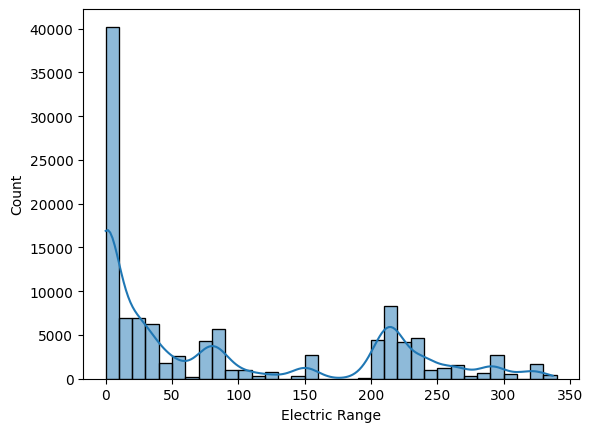

In [22]:
sns.histplot(ev_data, x = 'Electric Range', bins=range(0,350,10), kde = True)

In [23]:
len(ev_data['Postal Code'].unique())

773

In [24]:
len(ev_data['County'].unique())

165

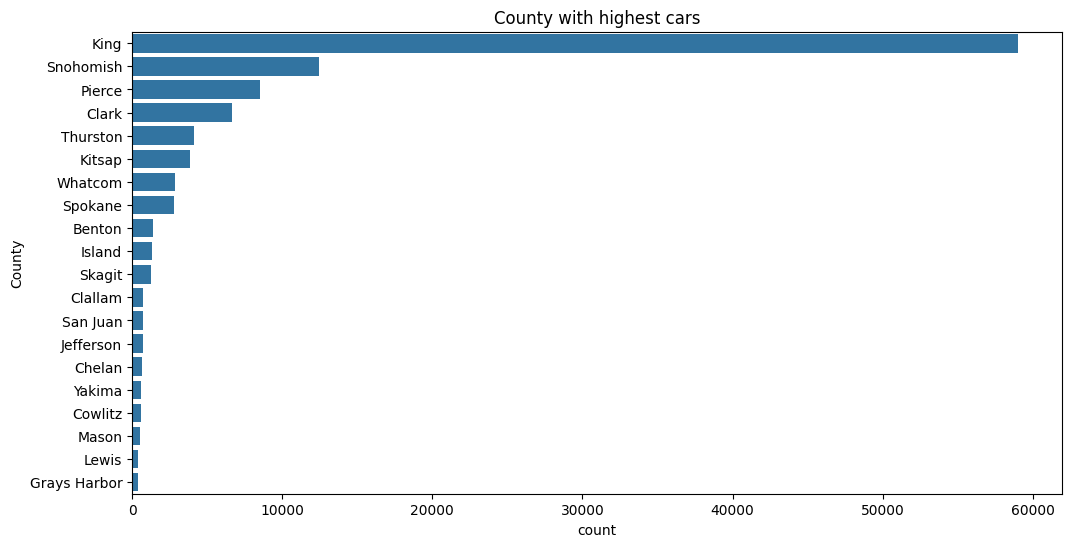

In [25]:
import textwrap
top_pincodes = ev_data['County'].value_counts().nlargest(20).index
filtered_data = ev_data[ev_data['County'].isin(top_pincodes)]

plt.figure(figsize=(12, 6))


sns.countplot(data=filtered_data, y='County', order=filtered_data['County'].value_counts().index)

labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in filtered_data['County'].value_counts().index ]
plt.yticks(ticks=range(len(labels)), labels=labels)

plt.title('County with highest cars')
plt.show()

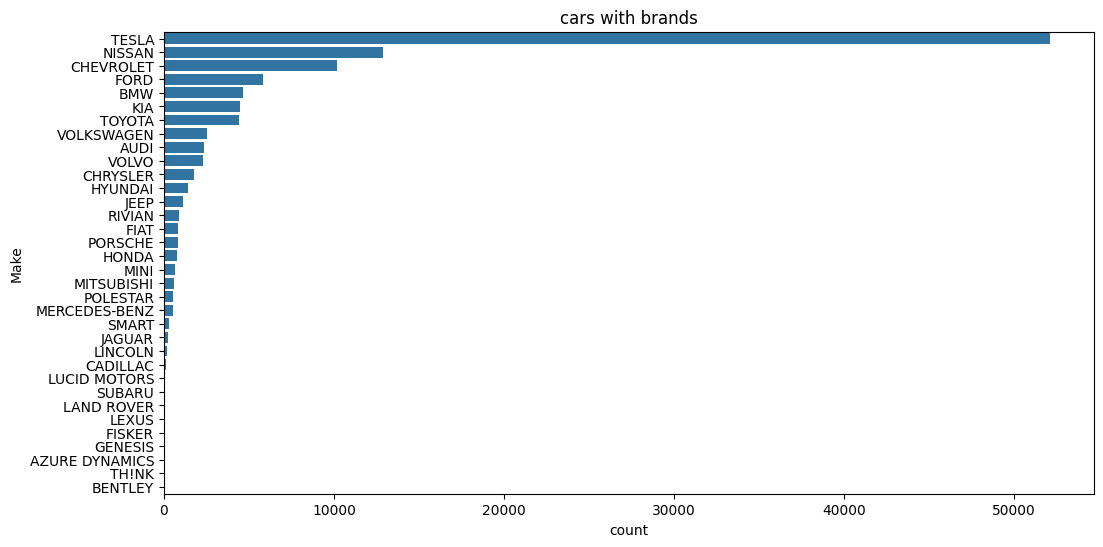

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ev_data, y='Make', order=ev_data['Make'].value_counts().index)

labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in ev_data['Make'].value_counts().index ]
plt.yticks(ticks=range(len(labels)), labels=labels)

plt.title('cars with brands')
plt.show()

In [27]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

<Axes: xlabel='count', ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

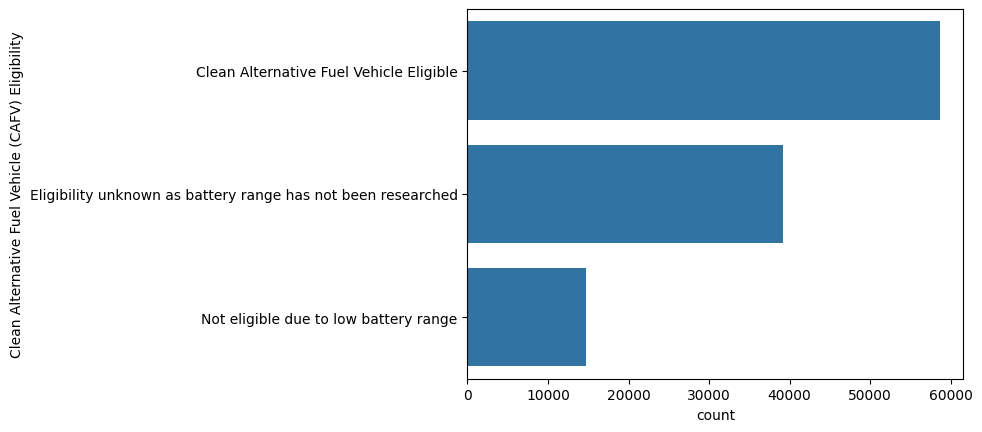

In [28]:
sns.countplot(data=ev_data, y='Clean Alternative Fuel Vehicle (CAFV) Eligibility', order=ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index)

In [29]:
ev_data['Electric Vehicle Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

<Axes: xlabel='Electric Vehicle Type', ylabel='count'>

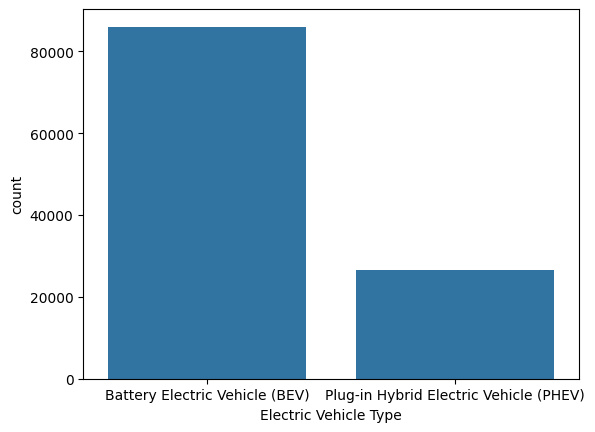

In [30]:
sns.countplot(data=ev_data, x='Electric Vehicle Type', order=ev_data['Electric Vehicle Type'].value_counts().index)

In [31]:
order=ev_data['State'].value_counts()

In [32]:
order

State
WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='Make'>

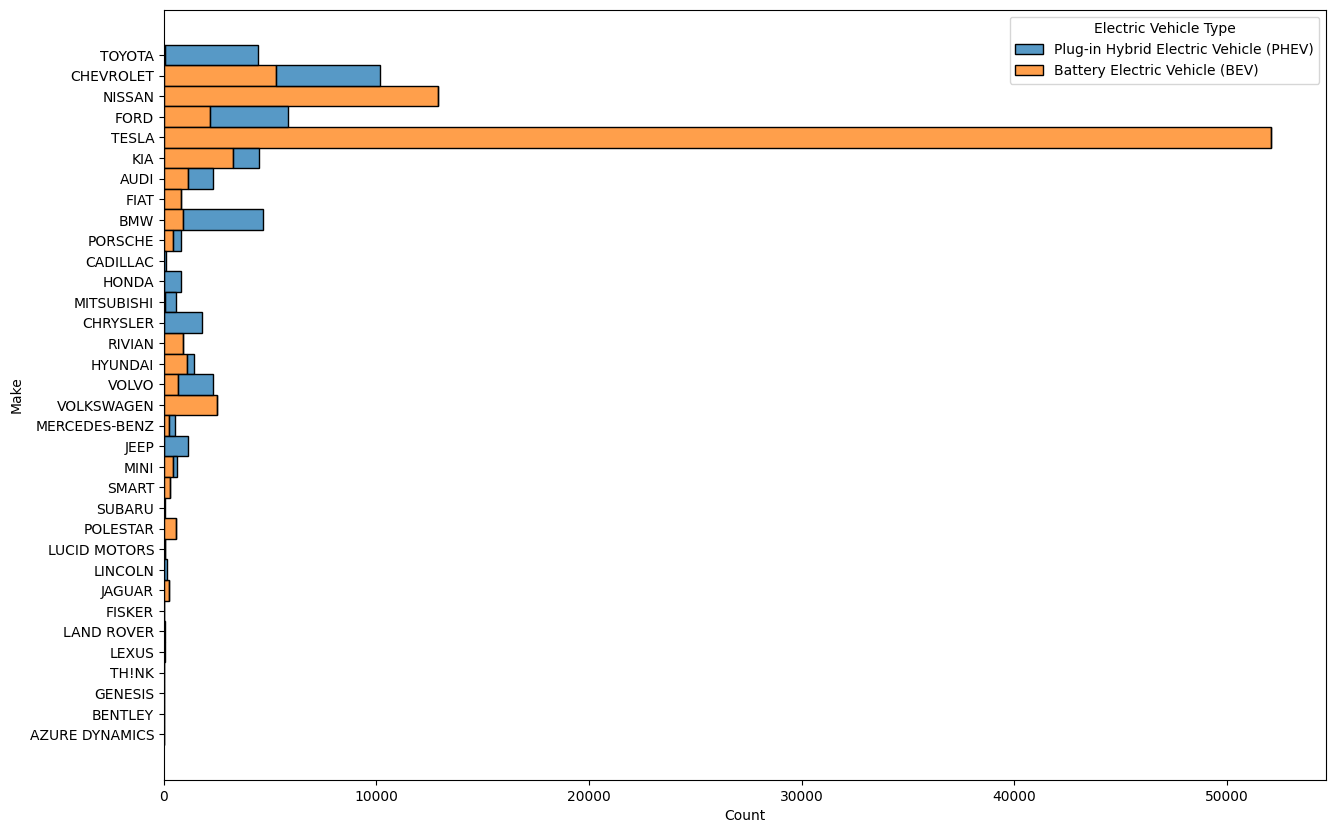

In [33]:
plt.figure(figsize=(15, 10))
sns.histplot(data=ev_data, y="Make", hue="Electric Vehicle Type", multiple="stack")


In [34]:
unique_years = sorted(ev_data['Model Year'].unique())

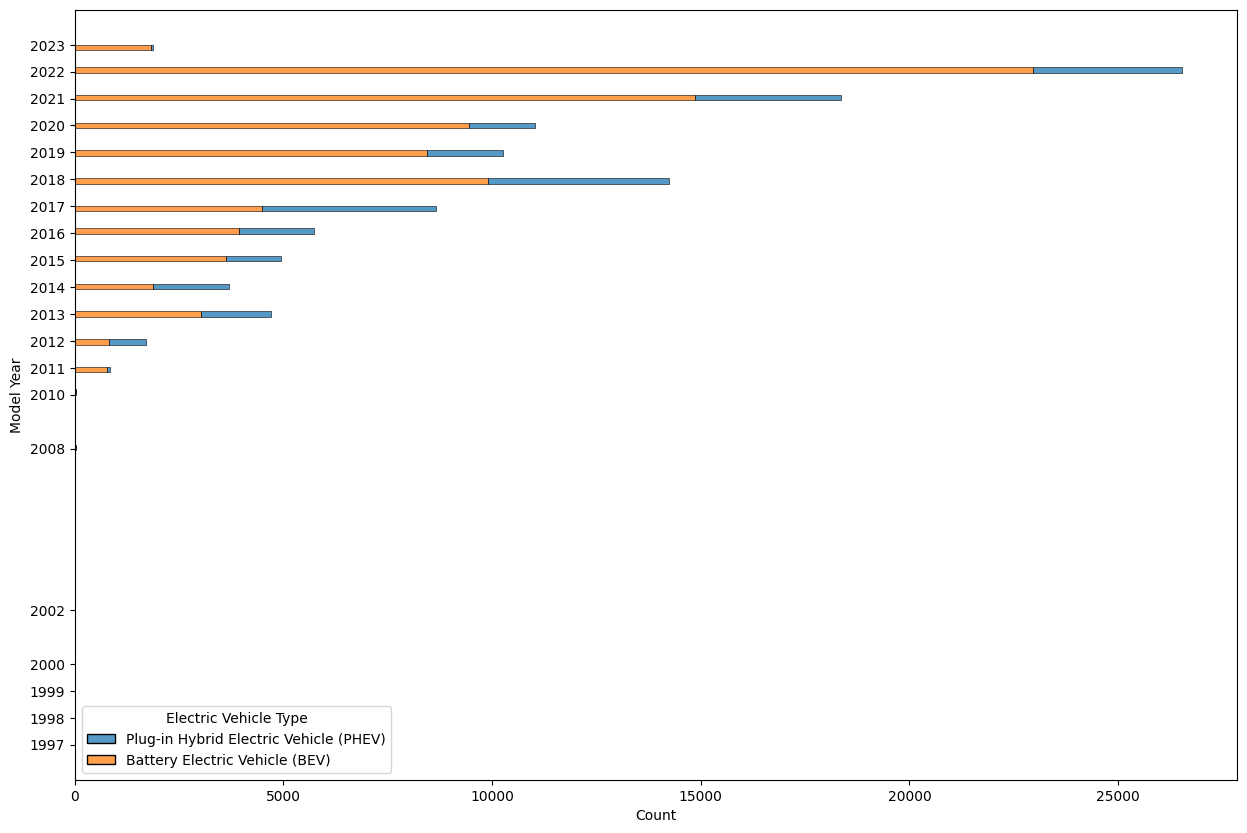

In [35]:
plt.figure(figsize=(15, 10))
sns.histplot(data=ev_data, y="Model Year", hue="Electric Vehicle Type", multiple="stack")
plt.yticks(unique_years)

plt.show()

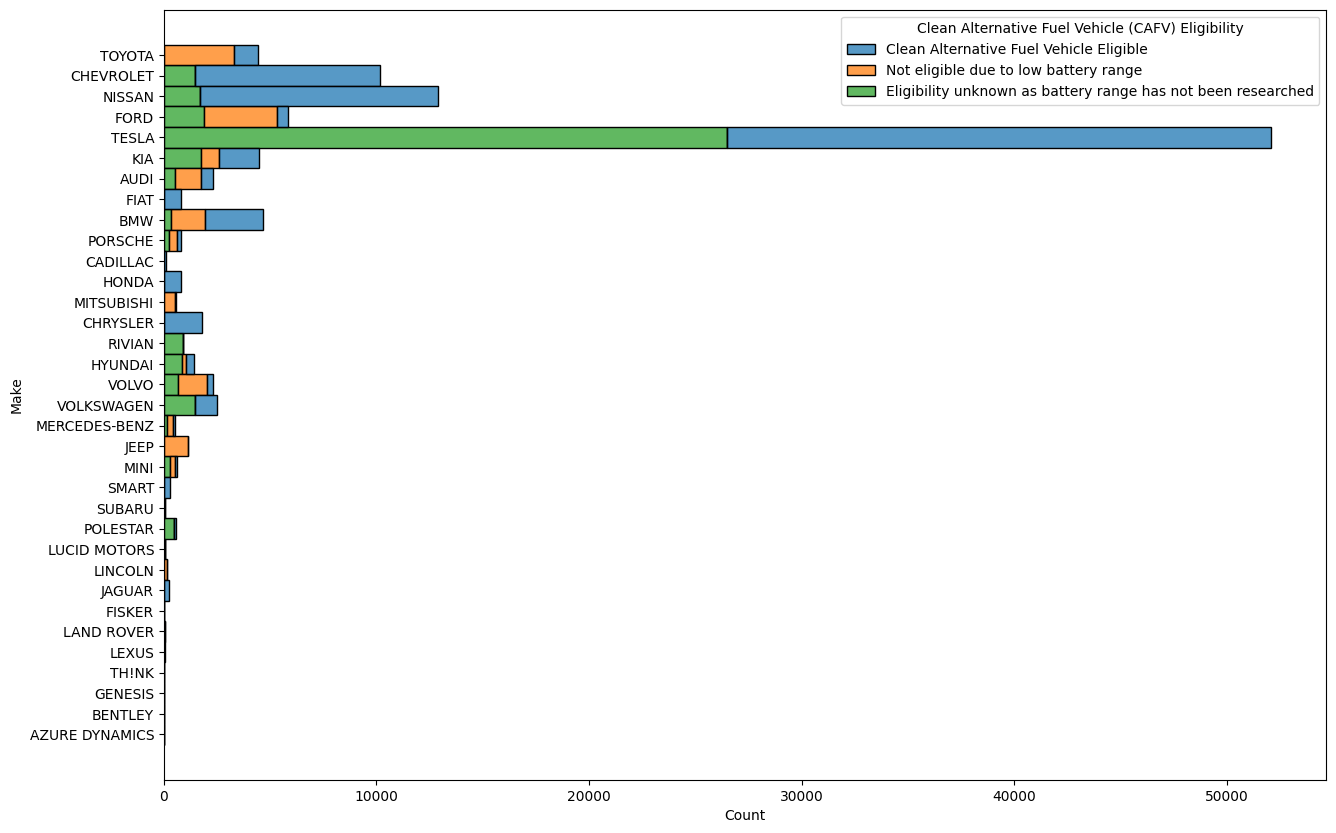

In [36]:
plt.figure(figsize=(15, 10))
sns.histplot(data=ev_data, y='Make', multiple = 'stack',hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

<Axes: xlabel='Base MSRP'>

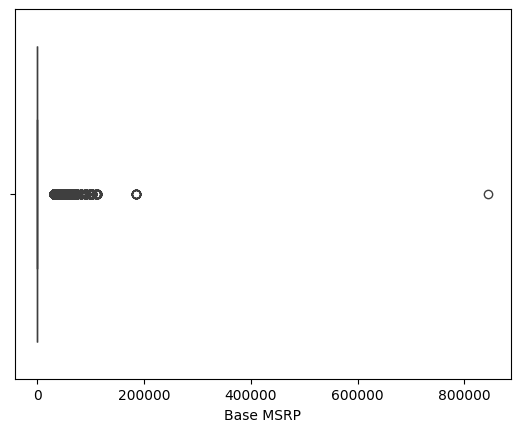

In [37]:
sns.boxplot(x = ev_data['Base MSRP'])

<Axes: xlabel='Base MSRP', ylabel='Count'>

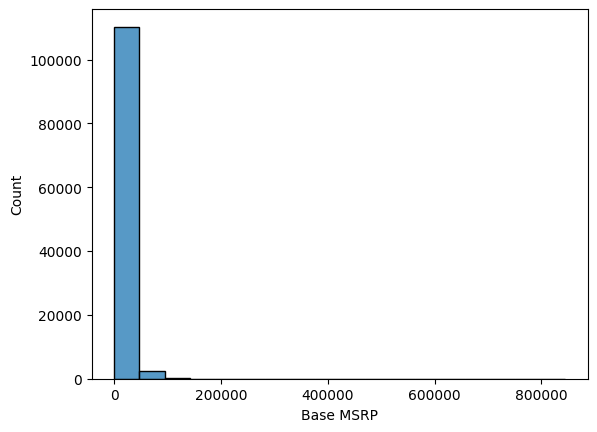

In [38]:
sns.histplot(data= ev_data, x = 'Base MSRP')

<Axes: xlabel='Base MSRP', ylabel='Electric Range'>

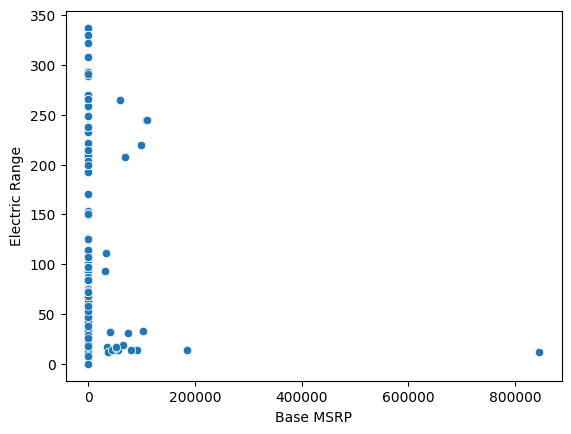

In [39]:
sns.scatterplot(data = ev_data , x = 'Base MSRP', y = 'Electric Range')

In [40]:
import plotly.express as px

In [41]:
ev_data['Vehicle Location'] = ev_data['Vehicle Location'].astype(str)

In [42]:
def extract_lat_lon(location):
    if pd.isna(location):
        return 0, 0
    else:
        try:
            lon, lat = location.replace("POINT (", "").replace(")", "").split()
            return float(lat), float(lon)
        except Exception as e:
            return 0, 0

In [43]:
ev_data['latitude'], ev_data['longitude'] = zip(*ev_data['Vehicle Location'].apply(extract_lat_lon))

In [44]:
ev_data.head(20)

VIN (1-10)     County               City State  Postal Code  Model Year  \
0   JTMEB3FV6N     Monroe           Key West    FL        33040        2022   
1   1G1RD6E45D      Clark           Laughlin    NV        89029        2013   
2   JN1AZ0CP8B     Yakima             Yakima    WA        98901        2011   
3   1G1FW6S08H     Skagit           Concrete    WA        98237        2017   
4   3FA6P0SU1K  Snohomish            Everett    WA        98201        2019   
5   5YJ3E1EB5J  Snohomish            Bothell    WA        98021        2018   
6   1N4AZ0CP4D  Snohomish            Everett    WA        98203        2013   
7   1N4AZ0CP0D  Snohomish           Mukilteo    WA        98275        2013   
8   1N4BZ0CP4G     Island            Clinton    WA        98236        2016   
9   KNDJP3AE2G     Skagit          Anacortes    WA        98221        2016   
10  WA1F2AFY1L   Thurston              Lacey    WA        98516        2020   
11  5YJXCBE23L      Grant         Moses Lake    WA        98837        2020   
12  3C3CFFGE3G  St. Clair          Mascoutah    IL        62258        2016   
13  1G1RD6S50G   Thurston          Rochester    WA        98579        2016   
14  5YJ3E1EA1J     Skagit         Burlington    WA        98233        2018   
15  1N4BZ1CP4K  Snohomish            Everett    WA        98201        2019   
16  1N4AZ0CP4D     Pierce           Kapowsin    WA        98344        2013   
17  1N4BZ0CP4H  Snohomish         Marysville    WA        98271        2017   
18  5UXKT0C50G  Snohomish           Lynnwood    WA        98037        2016   
19  5YJXCAE28G   Saratoga  Greenfield Center    NY        12833        2016   

         Make       Model                   Electric Vehicle Type  \
0      TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1   CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3   CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4        FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
5       TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
6      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
7      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
8      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
9         KIA        SOUL          Battery Electric Vehicle (BEV)   
10       AUDI        Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
11      TESLA     MODEL X          Battery Electric Vehicle (BEV)   
12       FIAT         500          Battery Electric Vehicle (BEV)   
13  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
14      TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
15     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
16     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
17     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
18        BMW          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
19      TESLA     MODEL X          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              42   
1            Clean Alternative Fuel Vehicle Eligible              38   
2            Clean Alternative Fuel Vehicle Eligible              73   
3            Clean Alternative Fuel Vehicle Eligible             238   
4              Not eligible due to low battery range              26   
5            Clean Alternative Fuel Vehicle Eligible             215   
6            Clean Alternative Fuel Vehicle Eligible              75   
7            Clean Alternative Fuel Vehicle Eligible              75   
8            Clean Alternative Fuel Vehicle Eligible              84   
9            Clean Alternative Fuel Vehicle Eligible              93   
10             Not eligible due to low battery range              20   
11           Clean Alternative

In [45]:
import plotly.express as px

fig = px.scatter_geo(ev_data, lat="latitude", lon="longitude", color="Electric Vehicle Type",
                     hover_name='Electric Vehicle Type',
                     title='Choropleth Map of Vehicle Locations',
                     projection='natural earth')
fig.show()

In [46]:
# location_year_counts = ev_data_cleaned.groupby(['Vehicle Location', 'Model Year']).size().reset_index(name='Count')

# # Create an Animated Choropleth Map with custom hover data
# fig = px.choropleth(
#     location_year_counts,
#     locations='Vehicle Location',  # Use the appropriate column for locations
#     locationmode='country names',   # Change to 'USA-states' if using US states
#     color='Count',
#     hover_name='Vehicle Location',
#     animation_frame='Model Year',   # Column to animate over
#     color_continuous_scale=px.colors.sequential.Viridis,  # Use a colorful sequential color scale
#     title='Number of Electric Vehicles by Location Over Years',
#     hover_data={
#         'Count': True,  # Display count
#         'Model Year': True  # Display model year
#     },
#     labels={'Count': 'Number of EVs'},  # Label for the color scale
# )

# # Customize layout
# fig.update_layout(
#     geo=dict(
#         showcoastlines=True,
#         coastlinecolor="Black",
#         showland=True,
#         landcolor="lightgray",
#         subunitcolor="blue",
#         countrycolor="blue",
#         projection_type='natural earth'
#     ),
#     title_font=dict(size=20)
# )

# # Show the animated map
# fig.show()


In [47]:
!pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.1 MB/s eta 0:00:00


In [48]:
import bar_chart_race as bcr

In [55]:
make_year_counts = ev_data.groupby(['Model Year', 'Make']).size().unstack()

In [50]:
make_year_counts = ev_data.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

In [53]:
make_year_counts.dtypes

Make          object
Model Year     int64
Count          int64
dtype: object

In [57]:
bcr.bar_chart_race(
    df=make_year_counts,         # DataFrame with year as index and makes as columns
    filename='/content/drive/MyDrive/Innomatics/car_manufacturers_race.mp4',  # Output MP4 file
    fixed_max=True,              # Keep the x-axis fixed for better comparison
    n_bars=15,                   # Show top 15 manufacturers at a time (adjustable)
    filter_column_colors=True,    # Avoid repeating colors
    period_length=1000,           # 1000 ms (1 second) per period
    title='Car Manufacturers Over Years'
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

